<a href="https://colab.research.google.com/github/mariabalaba/labs/blob/main/%D0%91%D0%B0%D0%BB%D0%B0%D0%B1%D0%B0_%D0%BB%D0%B0%D0%B1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20 вариант

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_science_fiction_films'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]
df.head()

,Rank,Film,Worldwide gross,Year,Ref
0,1,Avatar,"$2,846,089,541",2009,[1]
1,2,Star Wars: The Force Awakens,"$2,068,223,624",2015,[2]
2,3,Jurassic World,"$1,670,516,444",2015,[3]
3,4,Star Wars: The Last Jedi,"$1,332,539,889",2017,[4]
4,5,Jurassic World: Fallen Kingdom,"$1,308,467,944",2018,[5]


# Нормализуем таблицу

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Film             50 non-null     object
 2   Worldwide gross  50 non-null     object
 3   Year             50 non-null     int64 
 4   Ref              50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [ ]:
df['Worldwide gross'] = df['Worldwide gross'].str.replace(r"$","").str.replace(r",","")

In [ ]:
df['Worldwide gross'] = df['Worldwide gross'].astype('int64')

In [ ]:
df.drop(['Rank', 'Ref', 'Film'], axis=1, inplace = True)

In [ ]:
df['Year'] = df['Year'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Worldwide gross  50 non-null     int64
 1   Year             50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


In [ ]:
wg = df['Worldwide gross'].to_numpy()
year = df['Year'].to_numpy()
wg

array([2846089541, 2068223624, 1670516444, 1332539889, 1308467944,
       1123794079, 1104054072, 1074144248, 1056057273, 1033928303,
       1027082707,  868390560,  865011746,  836836967,  836303693,
        817400891,  807710000,  792910554,  775398007,  755356711,
        741847937,  723192705,  710644566,  709709780,  701729127,
        699856699,  694394724,  658344137,  653779970,  630162235,
        624026776,  618638999,  605425157,  603873119,  589390539,
        585410052,  582893671,  553709788,  552639571,  538375067,
        524976069,  521311890,  520881154,  490719763,  481800873,
        475106177,  467989645,  467365246,  466364682,  458863600])

In [ ]:
import numpy as np
wg_sort = np.sort(wg)
year_sort = np.sort(year)

# Гистограмма

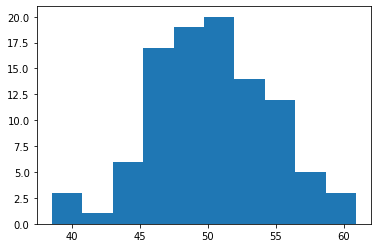

In [ ]:
from numpy.random import seed
from numpy.random import rand
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(data)
pyplot.show()

**инд. задание**

Text(0, 0.5, 'Frequency')

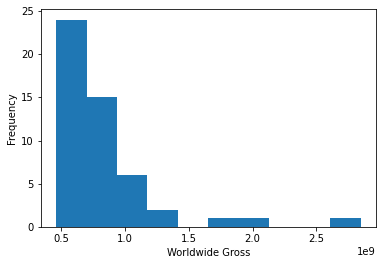

In [ ]:
fig, ax = plt.subplots()
ax.hist(wg_sort)
ax.set_xlabel('Worldwide Gross')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

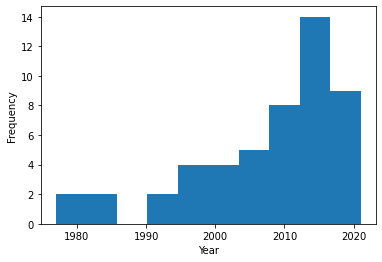

In [ ]:
fig, ax = plt.subplots()
ax.hist(year_sort)
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')

#График QQ

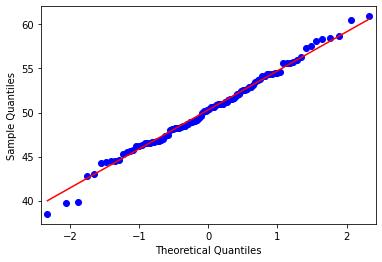

In [ ]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(data, line='s')
pyplot.show()

**инд. задание**

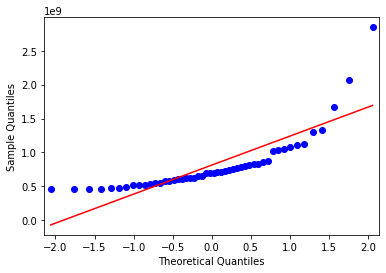

In [ ]:
qqplot(wg_sort, line = 's')
pyplot.show()

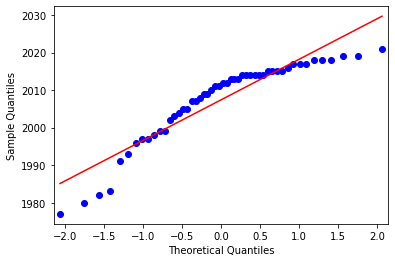

In [ ]:
qqplot(year_sort, line = 's')
pyplot.show()

# Тест Шапиро-Вилка

In [ ]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5*randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics = %.3f, p=%.3f' % (stat,p))
# interpret
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:  
  print('Sample does not look Gaussian (reject H0)')

Statistics = 0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


**инд. задание**

In [ ]:
stat, p = shapiro(wg_sort)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.696, p = 0.000
Sample does not look Gaussian (reject HO)


In [ ]:
stat, p = shapiro(year_sort)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.867, p = 0.000
Sample does not look Gaussian (reject HO)


# Тест д'Агостино на K ^ 2

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


**инд. задание**

In [ ]:
stat, p = normaltest(wg_sort)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=52.103, p = 0.000
Sample does not look Gaussian (reject HO)


In [ ]:
stat, p = normaltest(year_sort)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=12.565, p = 0.002
Sample does not look Gaussian (reject HO)


# Тест Андерсона-Дарлинга

In [ ]:
# Anderson-Darling Test
from numpy.random import seed 
from numpy.random import randn 
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = 5*randn(100) + 50
# normality test
result = anderson(data)
print('Statistics: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)'%(sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject H0)'%(sl, cv))  

Statistics: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


**инд. задание**

In [ ]:
result = anderson(wg_sort)
print('Statistic: %.3f' % result.statistic)

p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject HO)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject HO)' % (sl, cv))

Statistic: 4.124
15.000: 0.538, data does not look normal (reject HO)
10.000: 0.613, data does not look normal (reject HO)
5.000: 0.736, data does not look normal (reject HO)
2.500: 0.858, data does not look normal (reject HO)
1.000: 1.021, data does not look normal (reject HO)


In [ ]:
result = anderson(year_sort)
print('Statistic: %.3f' % result.statistic)

p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject HO)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject HO)' % (sl, cv))

Statistic: 2.239
15.000: 0.538, data does not look normal (reject HO)
10.000: 0.613, data does not look normal (reject HO)
5.000: 0.736, data does not look normal (reject HO)
2.500: 0.858, data does not look normal (reject HO)
1.000: 1.021, data does not look normal (reject HO)
